In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
x=pd.read_csv("movie_metadata.csv")

In [3]:
x.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
x.isnull().sum()


color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
x["num_critic_for_reviews"].fillna(0,inplace=True)

In [7]:
x["duration"].fillna(x["duration"].mean(),inplace=True)

In [8]:
x.groupby("director_name")["duration"].max().to_frame().sort_values(by="duration",ascending=False)

,duration
director_name,
Taylor Hackford,330.0
Michael Cimino,325.0
Chatrichalerm Yukol,300.0
Wolfgang Petersen,293.0
Francis Ford Coppola,289.0
...,...
Jason Naumann,35.0
Bill Melendez,25.0
Christopher Barnard,22.0


In [10]:
x[["director_name","budget"]].groupby("director_name").sum().sort_values(by="budget",ascending=False)

,budget
director_name,
Joon-ho Bong,1.225470e+10
Chan-wook Park,4.215000e+09
Katsuhiro Ôtomo,3.227520e+09
Lajos Koltai,2.500000e+09
Hayao Miyazaki,2.477000e+09
...,...
Eric England,0.000000e+00
Eric Bugbee,0.000000e+00
Shona Auerbach,0.000000e+00


In [16]:
x.groupby(["director_name"])["budget"].sum().sort_values(ascending=False).to_frame().T

director_name,Joon-ho Bong,Chan-wook Park,Katsuhiro Ôtomo,Lajos Koltai,Hayao Miyazaki,Peter Jackson,Steven Spielberg,Michael Bay,Sam Raimi,Ridley Scott,...,Erik White,Tim Fywell,Rohan Sippy,Shyam Madiraju,Eric Lavaine,Eric England,Eric Bugbee,Shona Auerbach,Emily Dell,Ferzan Ozpetek
budget,1.225470e+10,4.215000e+09,3.227520e+09,2.500000e+09,2.477000e+09,1.692000e+09,1.662901e+09,1.587000e+09,1.430975e+09,1.430000e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
x[x["duration"]==x["duration"].max()]["imdb_score"]

1710    8.2
Name: imdb_score, dtype: float64

In [24]:
x.groupby(["country","director_name"])["budget"].mean().to_frame()

budget
country              director_name                   
Afghanistan          Siddiq Barmak            46000.0
Argentina            Fabián Bielinsky       1500000.0
                     Jorge Gaggero           800000.0
                     Juan José Campanella   2000000.0
                     Lucrecia Martel        1400000.0
...                                               ...
USA                  Zal Batmanglij               NaN
                     Zoran Lisinac           250000.0
United Arab Emirates Amal Al-Agroobi         125000.0
West Germany         Harald Reinl                 NaN
                     Wolfgang Petersen     20500000.0

[2762 rows x 1 columns]

In [ ]:
x["director_name"].value_counts()

In [33]:
x["genres"].value_counts().sort_values(ascending=False)

Drama                                       236
Comedy                                      209
Comedy|Drama                                191
Comedy|Drama|Romance                        187
Comedy|Romance                              158
                                           ... 
Action|Adventure|Family|Fantasy|Thriller      1
Action|Animation|Sci-Fi|Thriller              1
Biography|Comedy|Drama|Music|Romance          1
Adventure|Comedy|Drama|Fantasy|Musical        1
Comedy|Crime|Musical|Mystery                  1
Name: genres, Length: 914, dtype: int64

# What is the average BasePay ?

In [34]:
x["budget"].mean()

39752620.436387606

# What is the highest amount of OvertimePay in the dataset ?


In [35]:
x["budget"].max()

12215500000.0

In [37]:
x[x["director_name"]=="James Cameron"]["budget"]

0       237000000.0
26      200000000.0
288     102000000.0
291     115000000.0
606      69500000.0
2486     18500000.0
3575      6500000.0
Name: budget, dtype: float64

In [38]:
x[x["director_name"]=="James Cameron"]["budget"].sum()

748500000.0

In [39]:
x[x["budget"]==x["budget"].max()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000


In [40]:
x[x["budget"]==x["budget"].min()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4799,Color,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,...,114.0,English,USA,Unrated,218.0,2003.0,20.0,7.2,1.37,754


In [41]:
x[x["title_year"]>=2005]["budget"].sum()

111862748901.0

In [44]:
x[x["imdb_score"]>=9]["movie_facebook_likes"]

66       37000
1937    108000
2765         0
2824         0
2837     14000
3207         0
3466     43000
3481     61000
4409         0
Name: movie_facebook_likes, dtype: int64

# Top 5 directors based on imdb rating

In [48]:
x[x["imdb_score"]==x["imdb_score"].max()]["director_name"].head(5)

2765    John Blanchard
Name: director_name, dtype: object

In [55]:
x.groupby("director_name")["imdb_score"].mean().sort_values(ascending=False).head(5)

director_name
John Blanchard      9.5
Sadyk Sher-Niyaz    8.7
Cary Bell           8.7
Mitchell Altieri    8.7
Mike Mayhall        8.6
Name: imdb_score, dtype: float64

In [65]:
x.groupby("title_year")["imdb_score"].max().sort_values(ascending=False).head()

title_year
1994.0    9.3
1972.0    9.2
2016.0    9.1
2008.0    9.0
1974.0    9.0
Name: imdb_score, dtype: float64

In [69]:
x[["budget","imdb_score"]].corr()

,budget,imdb_score
budget,1.000000,0.030688
imdb_score,0.030688,1.000000


<AxesSubplot:xlabel='language', ylabel='budget'>

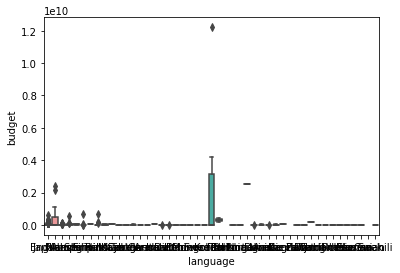

In [73]:
sns.boxplot(data=x,x="language",y="budget")

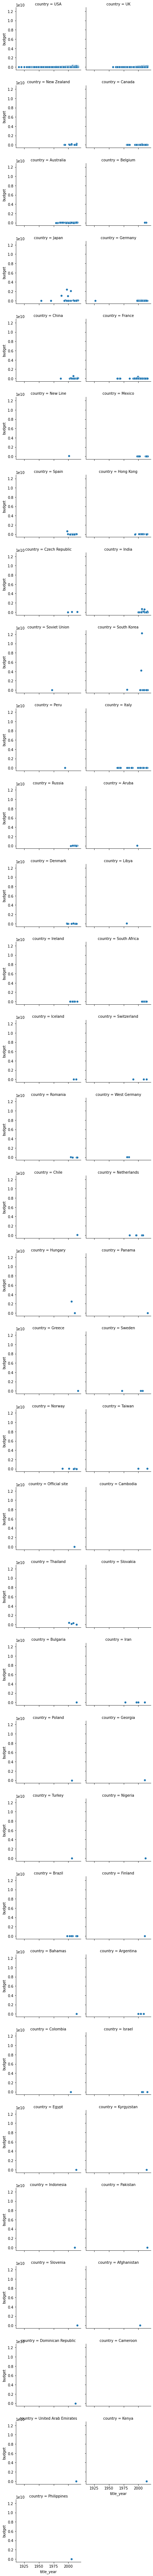

In [16]:
xx=sns.FacetGrid( data=x,
    row=None,
    col="country",col_wrap=2)
xx.map(sns.scatterplot,"title_year","budget")


In [18]:
def function (n):
    return n*0.5
x["num_user_for_reviews"].apply(function).to_frame()

,num_user_for_reviews
0,1527.0
1,619.0
2,497.0
3,1350.5
4,NaN
...,...
5038,3.0
5039,179.5
5040,1.5
5041,4.5
